In [1]:
import pandas as pd
import numpy as np

In [2]:
error = pd.read_csv('errors.csv')

In [3]:
error.head(5)

,SNo,Options,Error
0,1,['Golmaal is one of the funniest movies.'],No error found
1,2,['Golmaal is one between the funniest movies.'],No error found
2,3,['Golmaal is one of the funny movies.'],No error found
3,4,['Golmaal is first of the funniest movies.'],No error found
4,5,['I am feel better.'],Incorrect verb form


In [6]:
error_1 = error[error['Error'] != 'No error found']

In [7]:
error_1.head()

,SNo,Options,Error
4,5,"[""There isn't three banks next to my house.""]",Incorrect verb form
7,8,['There are a mall next to the restaurant?'],Incorrect verb form
9,11,['There are a temple near my house.'],Incorrect verb form
12,14,['I want few juice.'],Missing article
13,15,['I want many juice.'],Incorrect quantifier with uncountable noun


In [8]:
errors = error['Error']

In [9]:
errors = np.array(errors)

In [10]:
unique_errors, unique_error_counts = np.unique(errors, return_counts=True)

In [11]:
unique_error_counts

array([  15,   15,    1,    1,    5,  177,    8,   15,    7,    2,    6,
          3,   20,    1,    6,   15,   86,   13,    1,    7,    4,   11,
          8,    9,    5,    5,    6,    1,   29,   13,    6,   30,  290,
         60,    4,  164,  122,   10,    4,    1,    8,    3,   11,  238,
         23,   91,   15,    1,   29,    8,   12,    1,  190,    2,    4,
         57,  117,   22,    4,    1, 8352,   16,    5,    1,   11,   20,
          1,    2,   10,    5,    2,    2,    2,    1,   13,    6,   10,
          1,   31,   12,   55,   26,    6,    4,   18,   35,    3,    2,
         11,   67,    2,   18,    1,    2,    4,    3,   24,    1,   59,
          1,    1])

In [12]:
index = np.where(unique_errors == 'No error found')
unique_errors = np.delete(unique_errors, index)
unique_error_counts = np.delete(unique_error_counts, index)

In [13]:
import matplotlib.pyplot as plt

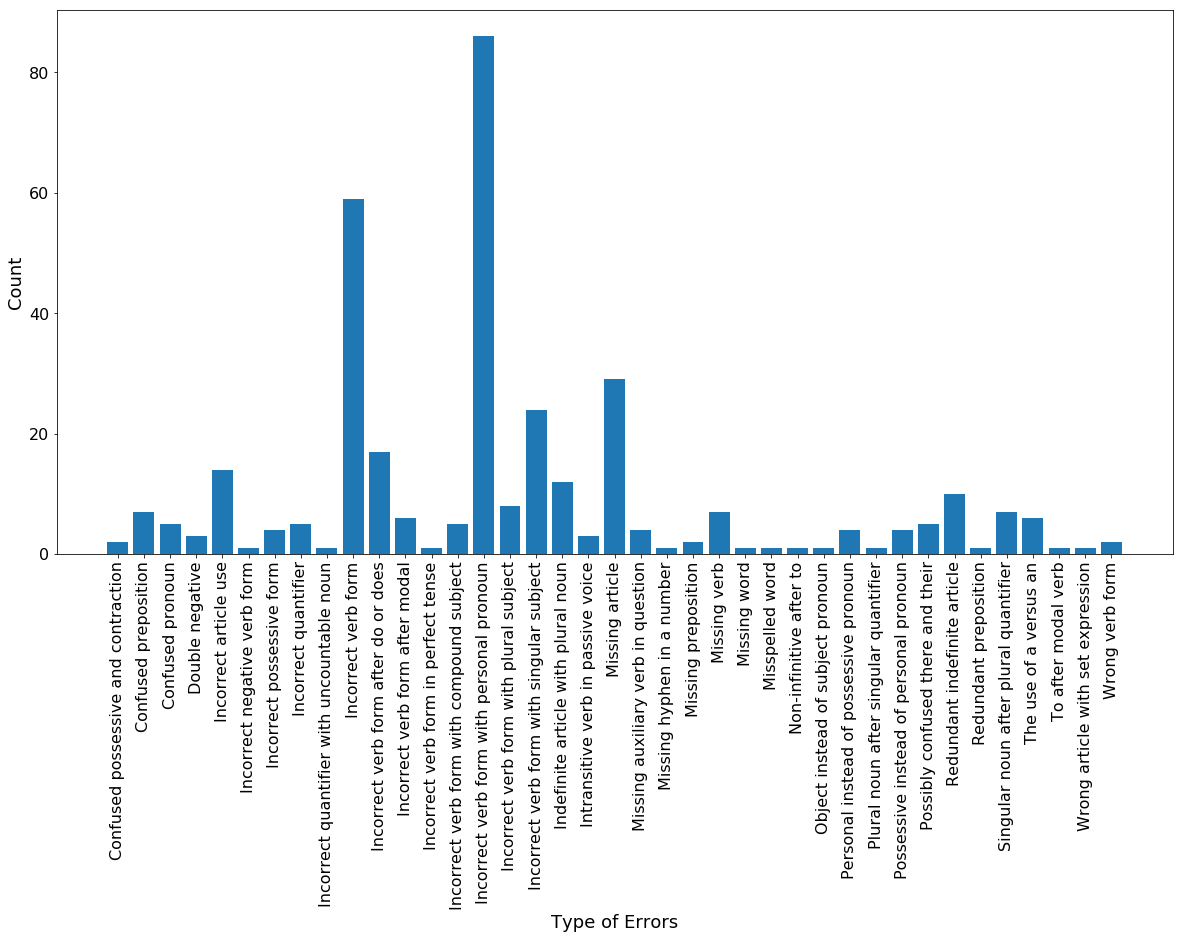

In [52]:
fig = plt.figure(figsize=(20,10))
plt.bar(unique_errors, unique_error_counts)
plt.xlabel('Type of Errors', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('errors_plot.png')

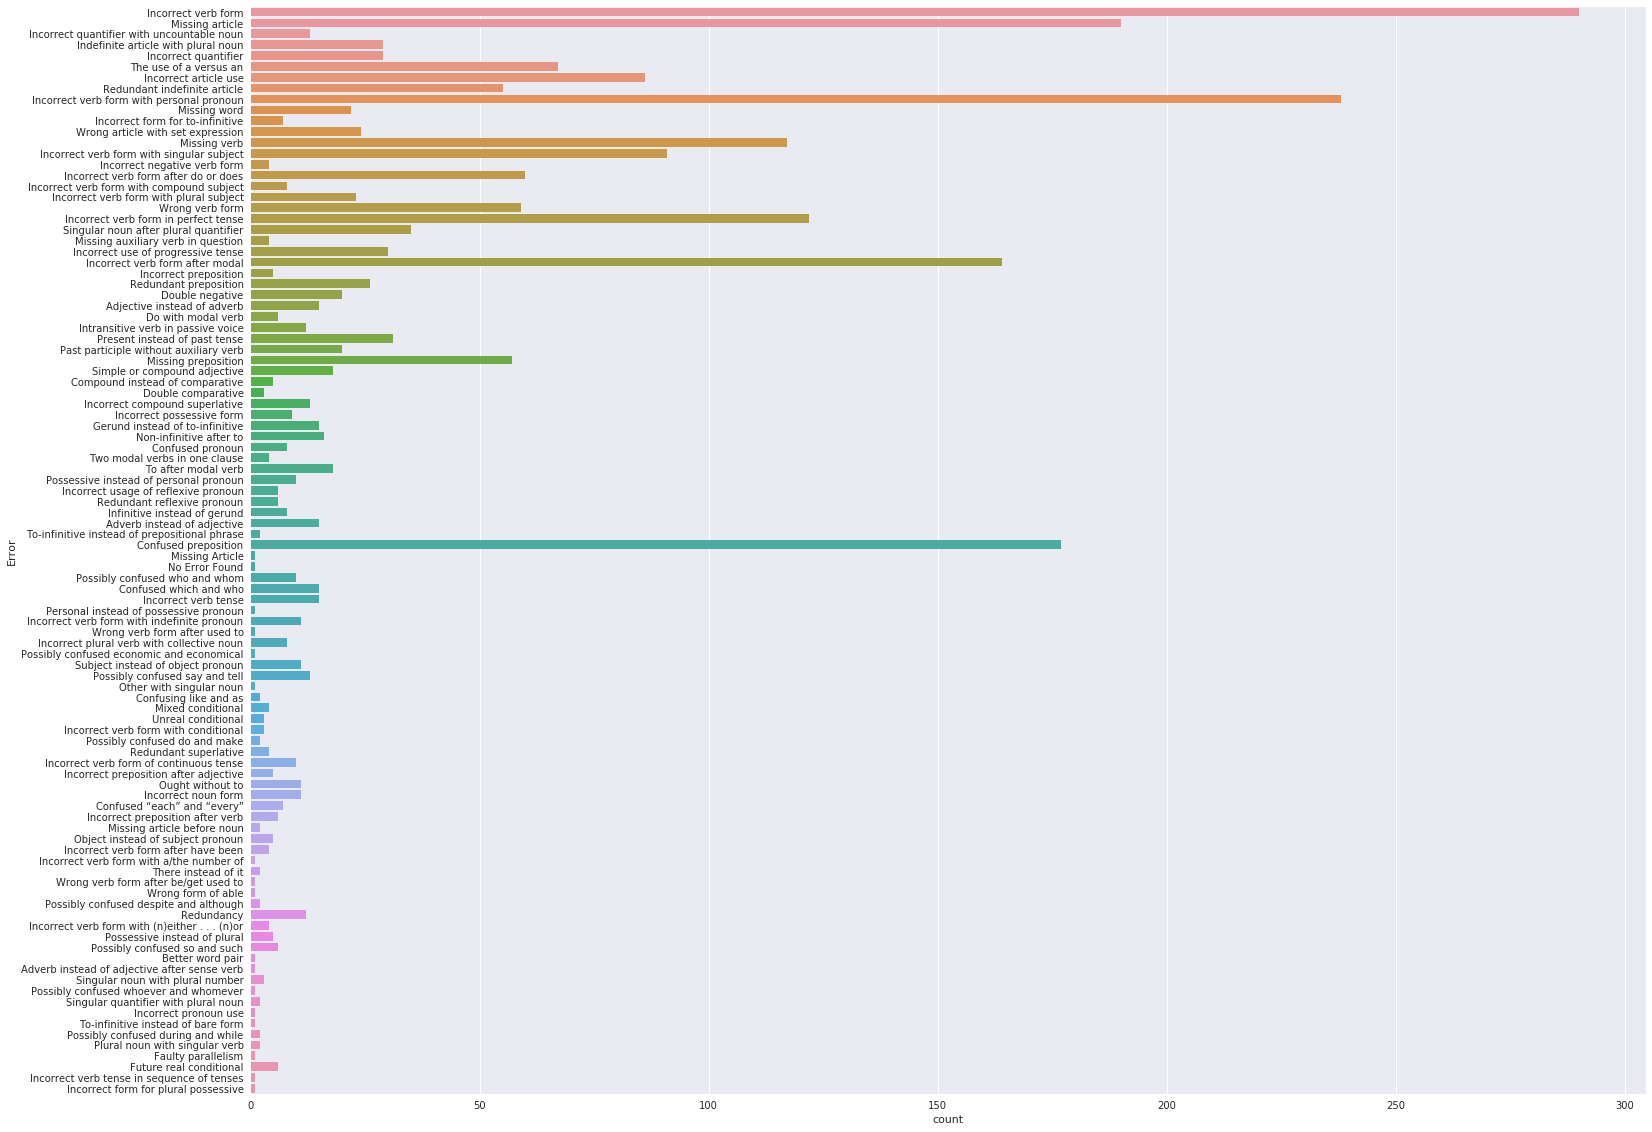

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,20))
sns.set(style="darkgrid")
sns_plot = sns.countplot(ax=ax, y="Error", data=error_1)
fig = sns_plot.get_figure()
fig.savefig('output.png') 

In [16]:
error.head()

,SNo,Options,Error
0,1,['Is there three banks next to my house.'],No error found
1,2,['There three banks next to my house.'],No error found
2,3,['There are three banks next to my house.'],No error found
3,4,"[""There aren't three banks next to my house.""]",No error found
4,5,"[""There isn't three banks next to my house.""]",Incorrect verb form


In [17]:
error.drop(['SNo'], axis = 1, inplace= True)

In [52]:
error.tail()

,Options,Error
10864,"'Fate', ' quiet', ' pitiless', ' bars the way.'",No error found
10865,"'He was silent ', ' as if watching.'",No error found
10866,"'He was quiet ', ' as if watching.'",No error found
10867,"'Quinn', ' who remained silent most of the mor...",No error found
10868,"'Quinn', ' who remained quiet most of the mor...",No error found


In [42]:
def exp(text):
    return text[text.find("\[\"|\'")+1:text.find("'|\"]")][1:]

In [49]:
exp(error['Options'][8956])

"'My neighbours were very kind and sympathetic when my dog died.'"

In [50]:
error['Options'] = error['Options'].apply(exp)

In [53]:
error.to_excel('error_complete.xlsx')